# Argo one filter scale

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

### Things to work on:
- For new filtering functions:
    - need to make new mask variable that will enable boundary correction feature <-- COMPLETE
    - need to use mask to selectively filter TEMP not included in boundary conditions
- Use these functions to perform the above calculations about "MKE" and "EKE" on one scale:
    - Pass temperature signal through filter at l=100m, then square the results <-- MKE
    - Square the temperature signal, pass it through filter at l=100m, then subtract MKE <-- EKE

### Load and plot data

In [2]:
import filt_funcs as ff
import my_stats

In [3]:
#glider data
ds_660_grid = xr.open_dataset('ctd_660_vert_4m_binned_29_june_2021.nc')
gselect=ds_660_grid.sel(dives=slice(50,450),ctd_pressure=slice(200,900))
gselect_filt=my_stats.glider_ds_filt(gselect,1,4,50)
gselect_var=my_stats.glider_var(gselect,gselect_filt)

#argo box
box=xr.open_dataset("202206_lon:(30,40)_lat:(-55,-50).nc")
aselect=my_stats.get_ds_interp(box,0,2000,4)
aselect_filt=my_stats.get_ds_filt(aselect,1,4,50)
aselect_var=my_stats.get_var(aselect,aselect_filt)

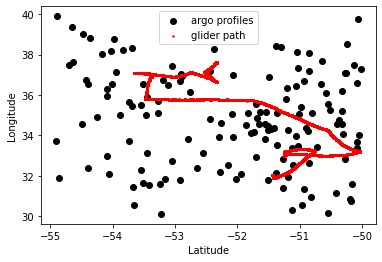

In [4]:
plt.scatter(aselect.LATITUDE,aselect.LONGITUDE,color='black',label='argo profiles')
plt.scatter(gselect.latitude,gselect.longitude,color='r',s=2,label='glider path')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

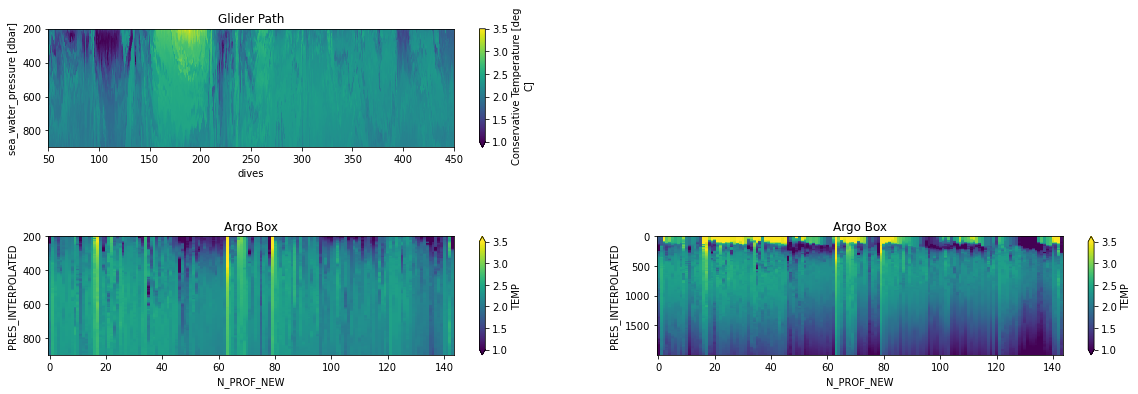

In [370]:
plt.figure(figsize=(20,6))

plt.subplot(2,2,1)
gselect.CT.plot(x='dives',y='ctd_pressure',vmin=1,vmax=3.5)
plt.gca().invert_yaxis()
plt.title('Glider Path')

plt.subplot(2,2,3)
aselect.TEMP.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=1,vmax=3.5)
plt.ylim(200,900)
plt.gca().invert_yaxis()
plt.title('Argo Box')

plt.subplot(2,2,4)
aselect.TEMP.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=1,vmax=3.5)
plt.gca().invert_yaxis()
plt.title('Argo Box')

plt.subplots_adjust(hspace=0.75)

## MKE/EKE method from Steinberg paper

These eqations are for energy at one spatial scale, where the eddy kinetic energy at scales smaller than the filter scale (EKE) and mean kinetic energy at scales larger than the filter scale (MKE) are:

$$
MKE = <u>^2
$$
$$
EKE = <u^2> - <u>^2
$$

(based on this paper: [Steinberg](https://journals.ametsoc.org/view/journals/phoc/52/8/JPO-D-21-0269.1.xml))

In [4]:
aselect_filt = ff.get_filt_multi(aselect,10,500,50,bound=True)

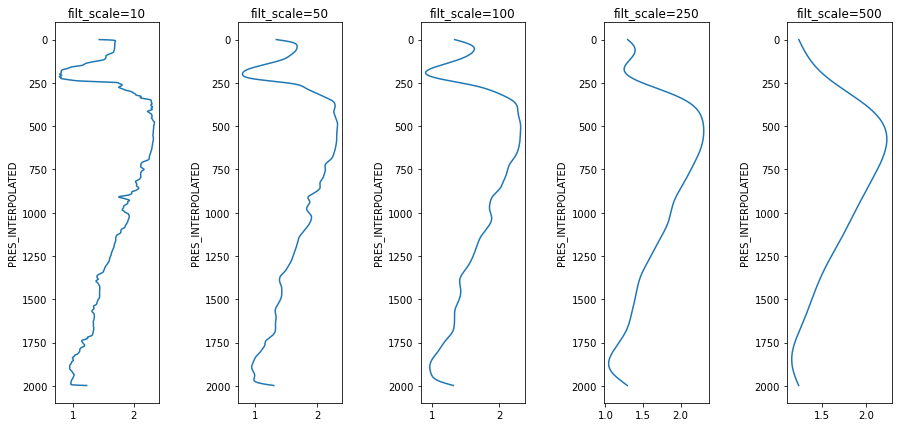

In [5]:
plt.figure(figsize=(15,7))

plt.subplot(1,5,1)
aselect_filt.isel(N_PROF=0).sel(FILT_SCALE=10.).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('filt_scale=10')

plt.subplot(1,5,2)
aselect_filt.isel(N_PROF=0).sel(FILT_SCALE=50.).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('filt_scale=50')

plt.subplot(1,5,3)
aselect_filt.isel(N_PROF=0).sel(FILT_SCALE=100.).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('filt_scale=100')

plt.subplot(1,5,4)
aselect_filt.isel(N_PROF=0).sel(FILT_SCALE=250.).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('filt_scale=250')

plt.subplot(1,5,5)
aselect_filt.isel(N_PROF=0).sel(FILT_SCALE=500.).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('filt_scale=500')

plt.subplots_adjust(wspace=0.75)

In [6]:
l=35
aselect_filt_l=aselect_filt.sel(FILT_SCALE=100)

MKE=aselect_filt_l**2

Text(0.5, 1.0, 'Argo Box')

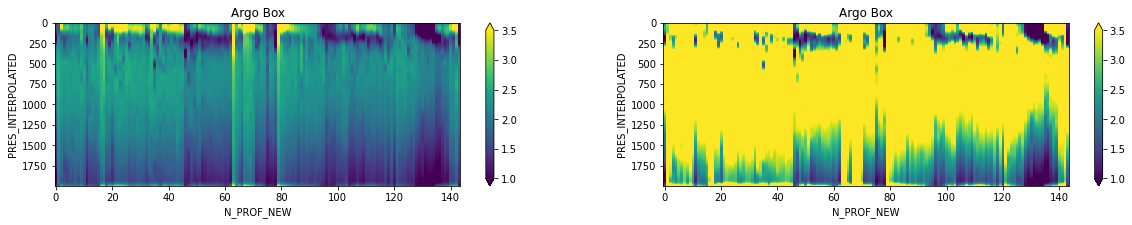

In [7]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
aselect_filt_l.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=1,vmax=3.5)
plt.gca().invert_yaxis()
plt.title('Argo Box')

plt.subplot(1,2,2)
MKE.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=1,vmax=3.5)
plt.gca().invert_yaxis()
plt.title('Argo Box')

In [9]:
u2 = aselect.TEMP**2
u2_filt = ff.get_filt_prof(u2,100)

EKE = u2_filt - MKE

Text(0.5, 1.0, 'Argo Box')

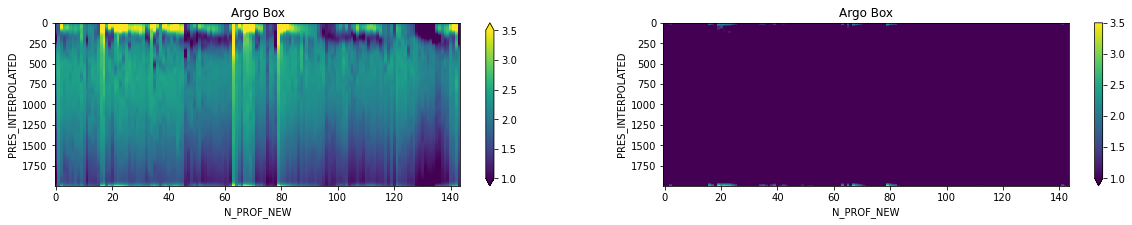

In [10]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
aselect_filt_l.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=1,vmax=3.5)
plt.gca().invert_yaxis()
plt.title('Argo Box')

plt.subplot(1,2,2)
EKE.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',vmin=1,vmax=3.5)
plt.gca().invert_yaxis()
plt.title('Argo Box')